**Comparison of Logistic Regression and Decision Tree model on the Diabetes data** <br>
https://www.kaggle.com/uciml/pima-indians-diabetes-database <br>
Using elbow method to find the optimal depth for the decision tree

**Comparison of K-means and K-medoids models and their clusters on the Diabetes data** <br>
Using elbow method for within total sum of squares to find the optimal number of clusters. <br>
Implementing TSNE on the data and feed the model to compare how the models handle clustering of the raw data and the tsne data.


In [1021]:
#install.packages("ggplot2")
#install.packages("pROC")
#install.packages("rpart")
#install.packages("rpart.plot")
#install.packages("tree")
#install.packages("caret")
#install.packages("cluster")
#install.packages("Rtsne")

also installing the dependencies 'cli', 'lifecycle', 'rlang', 'scales', 'vctrs'




  There are binary versions available but the source versions are later:
          binary source needs_compilation
cli        2.5.0  3.6.1              TRUE
lifecycle  1.0.0  1.0.3             FALSE
rlang     0.4.11  1.1.1              TRUE
scales     1.1.1  1.2.1             FALSE
vctrs      0.3.8  0.6.4              TRUE
ggplot2    3.3.3  3.4.4             FALSE

  Binaries will be installed
package 'cli' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'vctrs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\minaa\AppData\Local\Temp\RtmpWCTfvs\downloaded_packages


installing the source packages 'lifecycle', 'scales', 'ggplot2'

Warning message in install.packages("ggplot2"):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("ggplot2"):
"installation of package 'scales' had non-zero exit status"Warning message in install.packages("ggplot2"):
"installation of package 'ggplot2' had non-zero exit status"


  There is a binary version available but the source version is later:
       binary source needs_compilation
pROC 1.17.0.1 1.18.4              TRUE

  Binaries will be installed


Warning message:
"package 'pROC' is in use and will not be installed"


  There is a binary version available but the source version is later:
      binary source needs_compilation
rpart 4.1-15 4.1.21              TRUE

  Binaries will be installed


Warning message:
"package 'rpart' is in use and will not be installed"


  There is a binary version available but the source version is later:
           binary source needs_compilation
rpart.plot  3.0.9  3.1.1             FALSE



installing the source package 'rpart.plot'




  There is a binary version available but the source version is later:
     binary source needs_compilation
tree 1.0-40 1.0-43              TRUE

  Binaries will be installed


Warning message:
"package 'tree' is in use and will not be installed"also installing the dependencies 'cli', 'pillar', 'tibble', 'tzdb', 'glue', 'timechange', 'lifecycle', 'rlang', 'scales', 'vctrs', 'dplyr', 'clock', 'hardhat', 'ipred', 'lubridate', 'purrr', 'tidyselect', 'ggplot2', 'recipes'




  There are binary versions available but the source versions are later:
           binary source needs_compilation
cli         2.5.0  3.6.1              TRUE
pillar      1.6.0  1.9.0             FALSE
tibble      3.1.1  3.2.1              TRUE
tzdb        0.1.1  0.4.0              TRUE
glue        1.4.2  1.6.2              TRUE
timechange  0.0.2  0.2.0              TRUE
lifecycle   1.0.0  1.0.3             FALSE
rlang      0.4.11  1.1.1              TRUE
scales      1.1.1  1.2.1             FALSE
vctrs       0.3.8  0.6.4              TRUE
dplyr       1.0.6  1.1.3              TRUE
clock       0.3.0  0.7.0              TRUE
hardhat     0.1.5  1.3.0             FALSE
ipred      0.9-11 0.9-14              TRUE
lubridate  1.7.10  1.9.3              TRUE
purrr       0.3.4  1.0.2              TRUE
tidyselect  1.1.1  1.2.0             FALSE
ggplot2     3.3.3  3.4.4             FALSE
recipes    0.1.16  1.0.8             FALSE
caret      6.0-86 6.0-94              TRUE

  Binaries will be ins

installing the source packages 'pillar', 'lifecycle', 'scales', 'hardhat', 'tidyselect', 'ggplot2', 'recipes'

Warning message in install.packages("caret"):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("caret"):
"installation of package 'hardhat' had non-zero exit status"Warning message in install.packages("caret"):
"installation of package 'pillar' had non-zero exit status"Warning message in install.packages("caret"):
"installation of package 'scales' had non-zero exit status"Warning message in install.packages("caret"):
"installation of package 'tidyselect' had non-zero exit status"Warning message in install.packages("caret"):
"installation of package 'ggplot2' had non-zero exit status"Warning message in install.packages("caret"):
"installation of package 'recipes' had non-zero exit status"


  There is a binary version available but the source version is later:
        binary source needs_compilation
cluster  2.1.2  2.1.4              TRUE

  Binaries will be installed


Warning message:
"package 'cluster' is in use and will not be installed"


  There is a binary version available but the source version is later:
      binary source needs_compilation
Rtsne   0.15   0.16              TRUE

  Binaries will be installed


Warning message:
"package 'Rtsne' is in use and will not be installed"

In [1485]:
library(ggplot2)


ERROR: Error in library(ggplot2): there is no package called 'ggplot2'


Read the data and assign it to db  \
Check out its first few rows

In [1486]:
db = read.csv("diabetes.csv")
head(db)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


Check to see how many rows and columns our data has

In [1487]:
dim(db)

[1] 768   9

Check to see if there is any null value in our data

In [1488]:
sum(is.na(db))

[1] 0

Check to see which columns have zero values in them and then figure out if they acctually mean something or if they are impossible to be zero in real life.

In [1489]:
summary(db)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

***Discussion:*** \
It looks like "BloodPressure", "SkinThickness" and "BMI" have zero values. This could mean the incorrect value was inserted or it was not available. Now we need to do something about them before running any models on our data.

In [1490]:
dim(db[which(db$BloodPressure ==0 | db$SkinThickness == 0 | db$BMI== 0),])

[1] 231   9

***Discussion:*** \
There are 231 rows with 0 value in "BloodPressure", "SkinThickness" or "BMI". \
This is not a small number so I prefer to keep these rows and substitute the zero values with the mean of the related column. \
This way we avoid feeding our model misinformation without throwing away 231 of our data points. 

In [1491]:
bloodp_mean = mean(db[which(db$BloodPressure !=0), ]$BloodPressure)
skint_mean = mean(db[which(db$SkinThickness !=0), ]$SkinThickness)
bmi_mean = mean(db[which(db$BMI !=0), ]$BMI)

In [1492]:
db[which(db$BloodPressure ==0),]$BloodPressure = bloodp_mean
db[which(db$SkinThickness ==0),]$SkinThickness = skint_mean
db[which(db$BMI ==0),]$BMI = bmi_mean

Check to see the type of variables

In [1493]:
str(db)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : num  72 66 64 66 40 ...
 $ SkinThickness           : num  35 29 29.2 23 35 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


Change the "Outcome" column from integer to factor

In [1494]:
db$Outcome <- factor(db$Outcome)
is.factor(db$Outcome)

[1] TRUE

<font size="3"> **Part 1.1:**</font> 

Let's get a quick idea about how data is distributed in each column \
"Outcome" column is technically a categorical column with yes or no responses. So getting a summary on that does not help us much.

In [1495]:
summary(db[,-9])

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 64.00   1st Qu.:25.00  
 Median : 3.000   Median :117.0   Median : 72.20   Median :29.15  
 Mean   : 3.845   Mean   :120.9   Mean   : 72.41   Mean   :29.15  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   :18.20   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.50   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.40   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :32.46   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  

Plot box plots will give us a visual idea about how the data is distributed in each column and what the median is. \
Insulin has a much larger range and will make the box plot disproportional, therefore we will look at the last 3 columns.

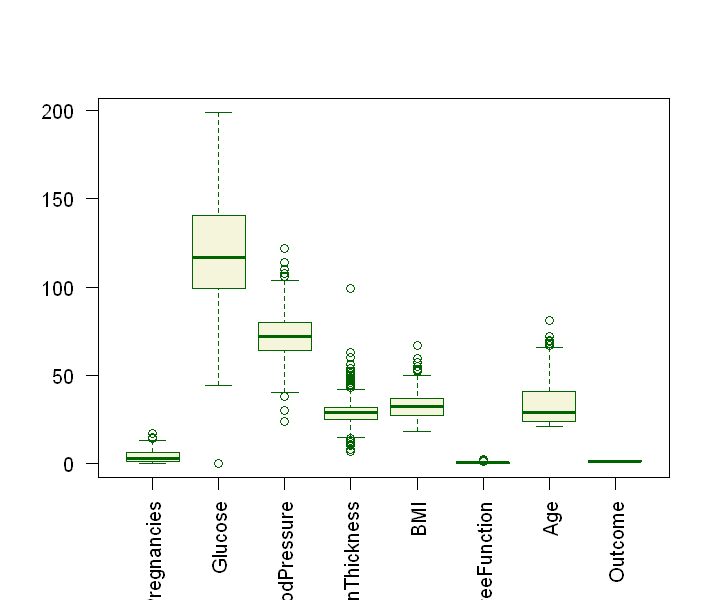

In [1496]:
opar = par(no.readonly = TRUE)
boxplot(db[,c(-5)], las=2,col="beige", border="darkgreen")

Now let's put them in 3 boxplots based on their approximate range to be able to look at them easily.

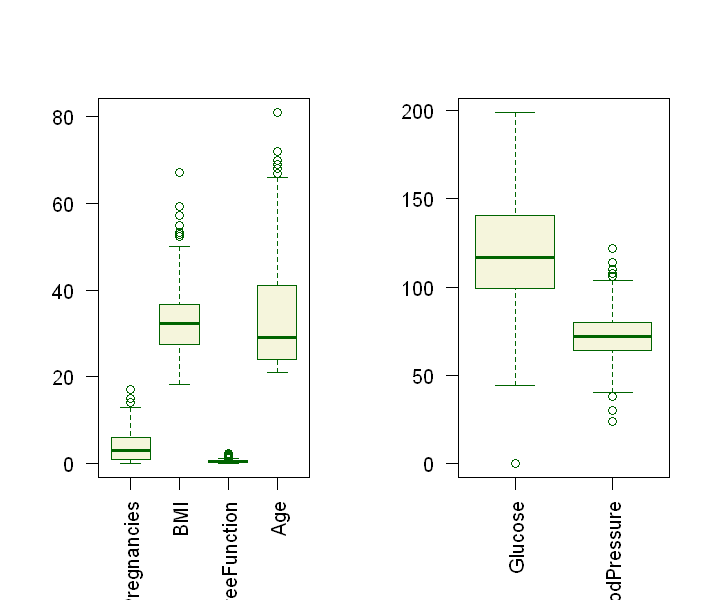

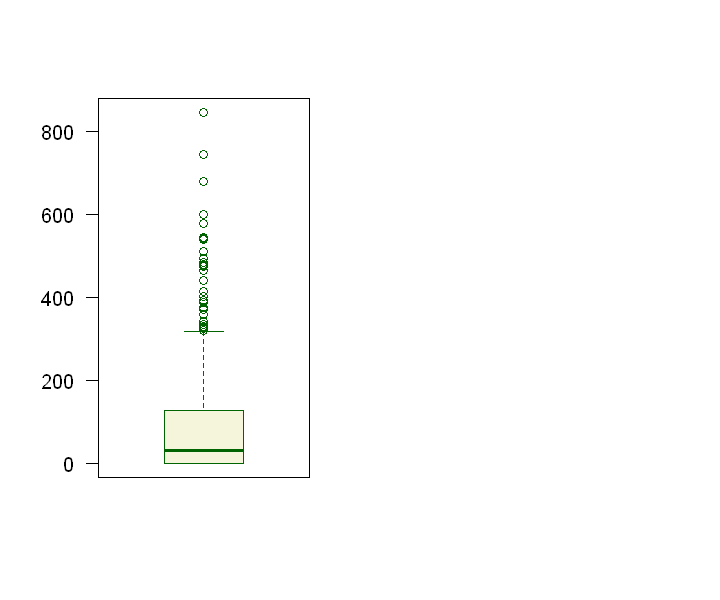

In [1497]:
par(mfrow=c(1,2))
boxplot(db[,c(1,6,7,8)], las=2,col="beige", border="darkgreen")
boxplot(db[,c(2,3)], las =2,col="beige", border="darkgreen")
boxplot(db[,c(5)], las =2,col="beige", border="darkgreen")
#options(repr.plot.width =7 , repr.plot.height =3.5)


***Discussion:*** \
It looks like that Glucose and BloodPressure have approximately normal distributions. However the other columns have some skewness to them. 

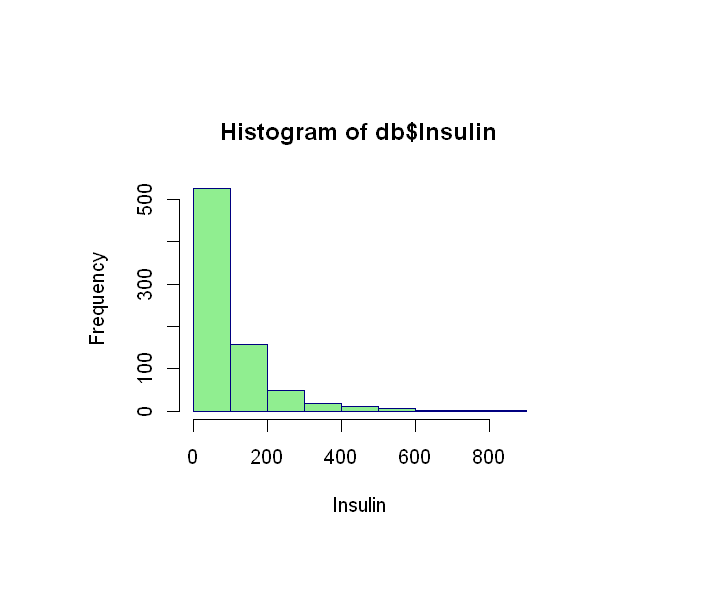

In [1498]:
par(pin = c(3,2))
hist(db$Insulin, xlab= "Insulin",col="lightgreen", border="navy")

For example the Insulin values have a right skewed distribution, having more frequency under 200.

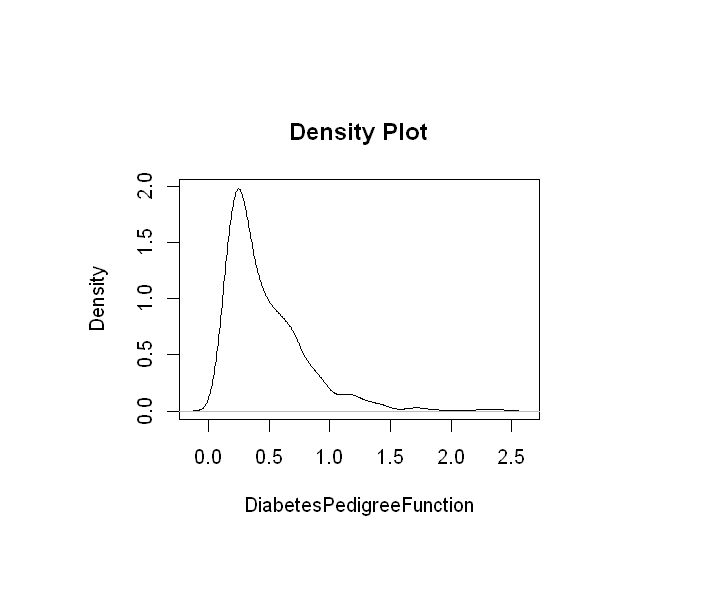

In [1499]:
par(pin = c(3,2))
plot(density(db$DiabetesPedigreeFunction), xlab="DiabetesPedigreeFunction", main= "Density Plot")

The "DiabetesPedigreeFunction" also has a right skewed distribution, with more concentration below 0.5.

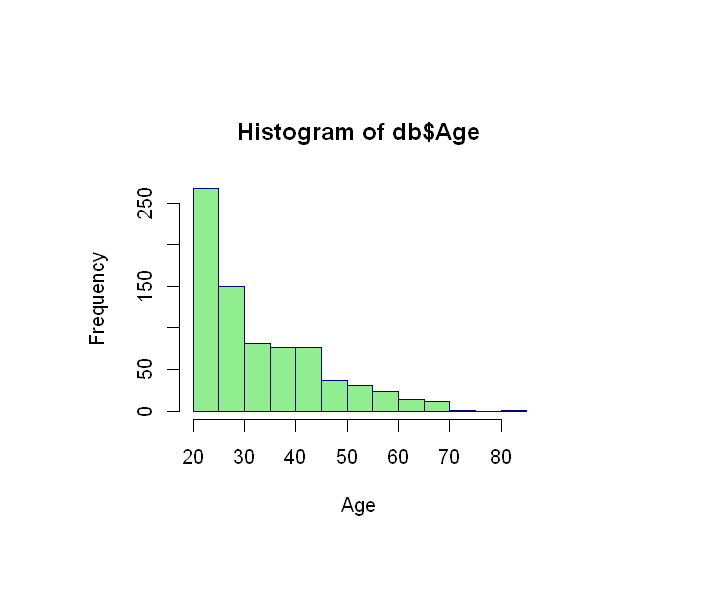

In [1500]:
par(pin = c(3,2))
hist(db$Age, xlab = "Age",col="lightgreen", border="navy")

We did not include the Outcome column in our box plot because it is a binary column, so let's look at its distribution below

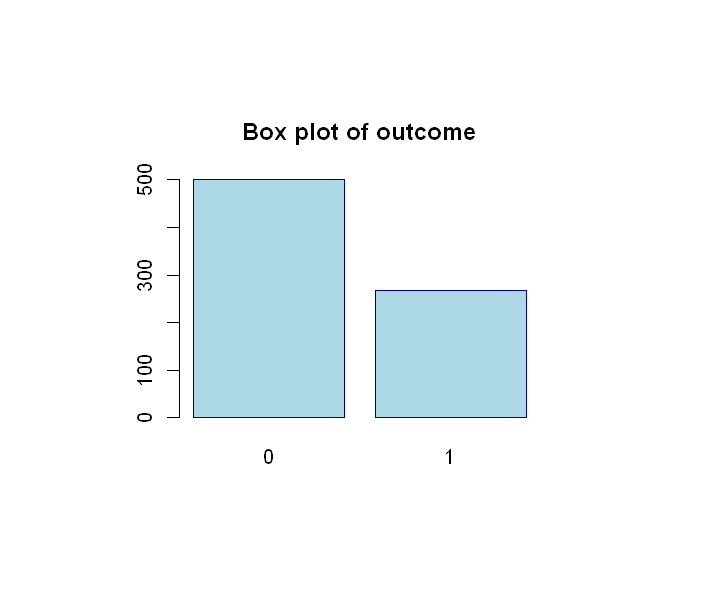

In [1501]:
par(pin = c(3,2))
plot(db$Outcome,col="lightblue", border="navy", main = "Box plot of outcome")


<font size="3"> **Part 1.2:**</font> 

***Discussion:*** \
The "Glucose" has approximately a normal distribution. We compared the mean and median value and they are close to each other but not exactly the same.

In [1502]:
cat("Mean:" ,mean(db$Glucose)) 
cat("\n")
cat("Median:" ,median(db$Glucose))

Mean: 120.8945
Median: 117

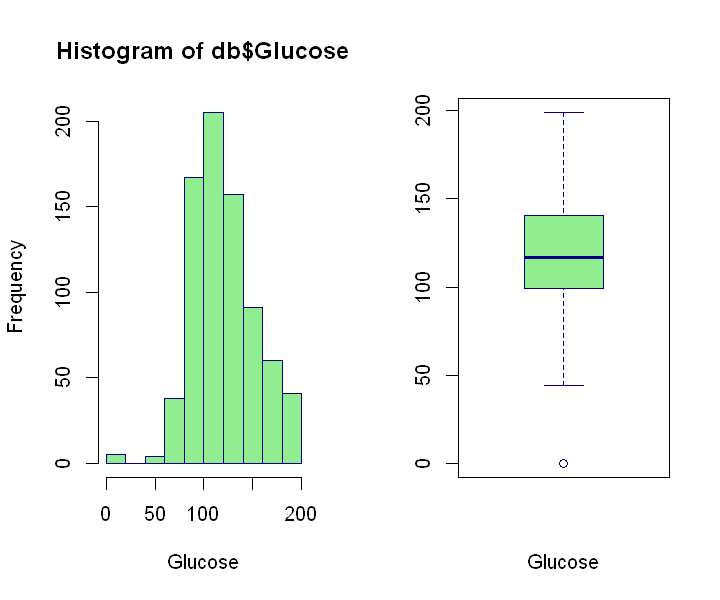

In [1503]:
par(mfrow=c(1,2))
hist(db$Glucose, xlab = "Glucose",col="lightgreen", border="navy")
boxplot(db$Glucose, xlab = "Glucose",col="lightgreen", border="navy")


We can also compare its distribution against a normal one by using qqnorm plot.

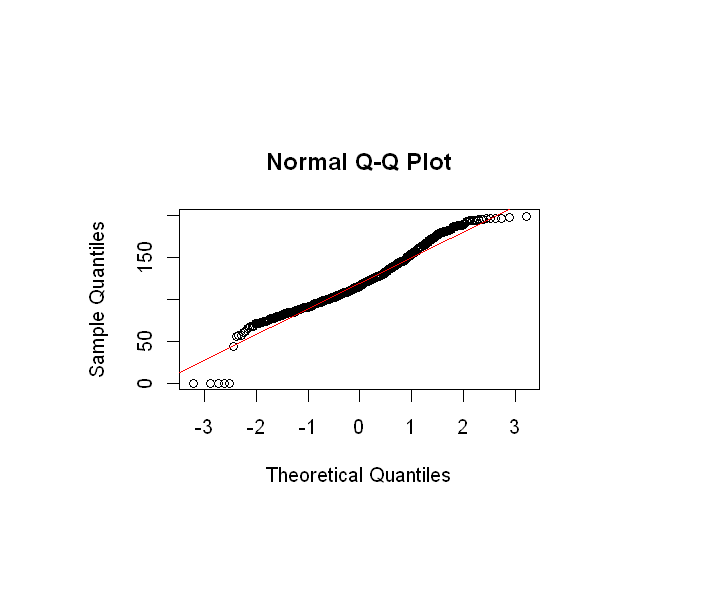

In [1504]:
par(pin = c(3,1.5))
qqnorm(db$Glucose)
qqline(db$Glucose, col = "red")

***Discussion:*** \
In the qq plot it looks like the Glucose quantiles are following along the straight line approximately. So the distribution is somehow normal.

<font size="3"> **Part 1.3:**</font> 

Divide data based on "Outcome = 1" and "Outcome = 0" and get the "Age" column.

In [1505]:
data1 = db[which(db$Outcome == 1),"Age"]
data2 = db[which(db$Outcome == 0),"Age"]

Run the t test on data1 and data2

In [1506]:
t.test(data1, data2)


	Welch Two Sample t-test

data:  data1 and data2
t = 6.9207, df = 575.78, p-value = 1.202e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 4.209236 7.545092
sample estimates:
mean of x mean of y 
 37.06716  31.19000 


***Discussion:*** \
h_0 null hypothesis: data1 and data2 have the same distribution \
h_a alternative hypothesis: not h_0

Based on the result of the t-test above, the p value is smaller than alpha=0.05, which is statistically significant. \
We reject the null hypothesis with 95% confidence and conclude that the two distributions of data1 and data2 are different (their means are different). \
In other words, people with diabetes and people without diabetes do not have the same age distribution, which means there could be some relationship between the age and possibility of having diabetes.

<font size="3"> **Part 1.4:**</font> 

Split 70% of the db data into training set, by randomly selecting 70% of the number of rows of our data frame and putting the remaining into our test set.

In [1507]:
set.seed(5)
train_rows = sort(sample(nrow(db), nrow(db)*.7))
db_train = db[train_rows,]
db_test = db[-train_rows,]

 <font size="5"> **LOGISTIC REGRESSION**</font> 

<font size="3"> **Part 1.5 and 1.6:**</font> 

In [1508]:
table(db$Outcome)


  0   1 
500 268 

Produce a logistic regression model to predict the ’Outcome’ variable using all the other variables and comment on the
results. Using the training data.

In [1509]:
model_log<- glm(Outcome ~ ., data = db_train, family = "binomial")

In [1510]:
summary(model_log)


Call:
glm(formula = Outcome ~ ., family = "binomial", data = db_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7601  -0.7219  -0.3970   0.7333   2.7872  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -9.6932436  0.9900221  -9.791  < 2e-16 ***
Pregnancies               0.1003623  0.0380991   2.634  0.00843 ** 
Glucose                   0.0336843  0.0042731   7.883 3.20e-15 ***
BloodPressure             0.0005227  0.0101244   0.052  0.95883    
SkinThickness            -0.0094044  0.0150734  -0.624  0.53269    
Insulin                  -0.0008422  0.0010745  -0.784  0.43314    
BMI                       0.1151058  0.0220036   5.231 1.68e-07 ***
DiabetesPedigreeFunction  1.1409275  0.3742409   3.049  0.00230 ** 
Age                       0.0127854  0.0114108   1.120  0.26251    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to 

Let's look at the coefficients of our model and their significance.

Which coefficinets are insignificant with alpha=0.05?

In [1511]:
alpha = 0.05
which(summary(model_log)$coef[,4] < alpha)

(Intercept)              Pregnancies                  Glucose 
                       1                        2                        3 
                     BMI DiabetesPedigreeFunction 
                       7                        8

***Discussion:*** \
Based on the p values of the coefficients for different columns in our model, \
with 95% confidence (if we set the alpha = 0.05) we cannot reject the h_0 for Age, BloodPressure and SkinThickness, \
which means these three do not improve our models for predicting diabetes. \
This sounds counter intuitive for Age. Specially when we saw that Age column and Outcome column did have some correlation.

In [1512]:
coef_data = coef(model_log)

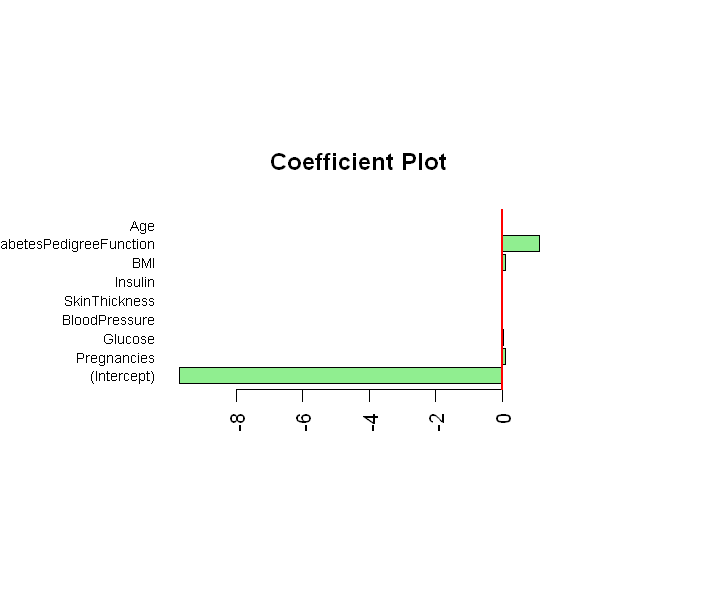

In [1513]:
par(pin = c(3,1.5))
barplot(coef_data, beside=TRUE, las=2, main="Coefficient Plot", 
        horiz=TRUE, col="lightgreen", border="black", cex.names=0.7)
abline(v=0, col="red", lwd=2)

Predict probabilities for Outcome with our logistic regression model.

In [1514]:
predicted_prob_log = predict(model_log,type="response")
head(predicted_prob_log)

1          2          3          4          6          7 
0.69527108 0.04272466 0.70909077 0.04060364 0.12347324 0.05068793

We would like to convert the probability values to 0 and 1 to be able to compare them to our Outcome values. \
We will assign 0 to probabilities less than 0.5 and 1 to equal to or above 0.5.

In [1515]:
predicted_outcome_log = ifelse(predicted_prob_log < 0.5, 0, 1)
head(predicted_outcome_log)

1 2 3 4 6 7 
1 0 1 0 0 0

In [1516]:
accuracy_log_train = mean(db_train$Outcome == predicted_outcome_log)
accuracy_log_train

[1] 0.7821229

***Discussion:*** \
Our logistic model has correctly predicted 76% of our training data. \
This could be investigated more by looking at the sensitivity and specificity of our logistic regression model.

It looks like our model did a good job for true positives and true negatives

In [1421]:
table(observed = db_train$Outcome, predicted = predicted_outcome_log)

        predicted
observed   0   1
       0 301  42
       1  75 119

Let's see what our AUC score is:

In [1422]:
library(pROC)
auc(db_train$Outcome, predicted_outcome_log)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.7455

<font size="3"> **Part 1.7:**</font> 

Logistic Regression on the selected features with comparable accuracy:
Let's see which features had larger p-values in our full model. This means the features that our model estimated to have less effect on predicting our outcomes.

In [1423]:
summary(model_log)$coef[which(summary(model_log)$coef[,4] > alpha),]

,Estimate,Std. Error,z value,Pr(>|z|)
BloodPressure,0.0005226893,0.010124450,0.05162644,0.9588263
SkinThickness,-0.0094043630,0.015073434,-0.62390314,0.5326912
Insulin,-0.0008422249,0.001074494,-0.78383415,0.4331374
Age,0.0127854230,0.011410757,1.12047103,0.2625131


We are using our whole data this time and we are eliminating BloodPressure, SkinThickness and Insulin in our model:

In [1424]:
model_log_reduced<- glm(Outcome ~ .   -BloodPressure -SkinThickness-Insulin    , data = db_train, family = "binomial")
summary(model_log_reduced)


Call:
glm(formula = Outcome ~ . - BloodPressure - SkinThickness - Insulin, 
    family = "binomial", data = db_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6651  -0.7248  -0.3977   0.7063   2.7853  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -9.575687   0.880598 -10.874  < 2e-16 ***
Pregnancies               0.099079   0.037898   2.614  0.00894 ** 
Glucose                   0.032648   0.004027   8.107 5.21e-16 ***
BMI                       0.105694   0.017767   5.949 2.70e-09 ***
DiabetesPedigreeFunction  1.091766   0.368896   2.960  0.00308 ** 
Age                       0.013814   0.010895   1.268  0.20486    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 702.55  on 536  degrees of freedom
Residual deviance: 503.06  on 531  degrees of freedom
AIC: 515.06

Number of Fisher Scoring iterations:

predicted probability for our reduced model(rm):

In [1425]:
predicted_prob_rm = predict(model_log_reduced, type = "response")
predicted_outcome_rm = ifelse(predicted_prob_rm <0.5, 0, 1)

In [1426]:
auc(db_train$Outcome, predicted_outcome_rm)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.7469

By eliminating BloodPressure, Insulin and SkinThickness we still get a comparable AUC score. \
Now let's use these two models to predict our test dataset.

Predicted probabilities of our full model on the **test dataset**. \
We converted the probabilities to 0 and 1 to be like Outcomes.

In [1427]:
predicted_prob_1 = predict(model_log, newdata = db_test, type="response")
predicted_1 = ifelse(predicted_prob_1 <0.5, 0, 1)
AUC_1 = auc(db_test$Outcome, predicted_1)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Predicted probabilities of our **reduced model** on the **test dataset**. \
We converted the probabilities to 0 and 1 to be like Outcomes.

In [1428]:
predicted_prob_2 = predict(model_log_reduced, newdata = db_test, type="response")
predicted_2 = ifelse(predicted_prob_2 <0.5, 0, 1)
AUC_2 = auc(db_test$Outcome, predicted_2)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


In [1432]:
cat("AUC of Full Model:", AUC_1 )

AUC of Full Model: 0.7097607

In [1430]:
cat("AUC of Reduced Model:", AUC_2)

AUC of Reduced Model: 0.706576

***Discussion:*** \
As we can see, the auc score declined in both full and reduced model on predicting the test dataset.\
This could be because our model was overfitting and was doing a good job on the training data but not so much on a never-seen dataset.
Both models had similar AUC scores for the test data, which could mean the less complex model also can provide similar accuracy.

<font size="3"> **Part 1.8:**</font> 

 <font size="5"> **DECISION TREE**</font> 

We will use rpart library to create our tree model

In [1434]:
library(rpart)
library(rpart.plot)

In [1457]:
# Create our model using training dataset
model_tree = rpart(Outcome ~ . , data=db_train, method = "class")
summary(model_tree)

Call:
rpart(formula = Outcome ~ ., data = db_train, method = "class")
  n= 537 

          CP nsplit rel error    xerror       xstd
1 0.25773196      0 1.0000000 1.0000000 0.05737980
2 0.12886598      1 0.7422680 0.7835052 0.05381004
3 0.02061856      2 0.6134021 0.6958763 0.05181924
4 0.01546392      4 0.5721649 0.7061856 0.05207166
5 0.01030928      8 0.5051546 0.7061856 0.05207166
6 0.01000000      9 0.4948454 0.7474227 0.05303202

Variable importance
                 Glucose                      BMI                      Age 
                      38                       15                       13 
                 Insulin            BloodPressure              Pregnancies 
                       9                        8                        7 
           SkinThickness DiabetesPedigreeFunction 
                       6                        2 

Node number 1: 537 observations,    complexity param=0.257732
  predicted class=0  expected loss=0.3612663  P(node) =1
    class count

Visualize our tree, from yellow color (no diabetes) to blue color (diabetes)

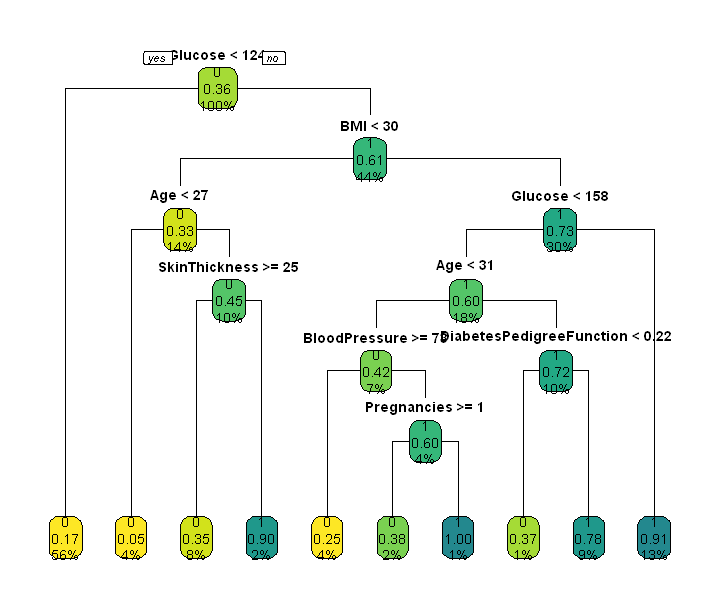

In [1458]:
rpart.plot(model_tree, box.palette = "YlGnBl" ,type =1)

***Discussion:*** \
Our tree has the depth of 6. We see that the Glucose variable has the highest importance in our model. After that, Age and BMI are important too. \
The BloodPressure and SkinThinckness variables are not doing a great job in partitioning the data (42% and 45% respectively). It is interesting that Glocuse has such an importance in partitioning our data that our model has partitioned the data two times based on this variable.

Predict our train data

In [1459]:
predicted_train = predict(model_tree, newdata = db_train, type = "class")
head(predicted_train)

1 2 3 4 6 7 
1 0 0 0 0 0 
Levels: 0 1

In [1460]:
accuracy_dt_train = mean(db_train$Outcome == predicted_train)
cat("Accuracy of the decision tree on predicting train data is", accuracy_dt_train)

Accuracy of the decision tree on predicting train data is 0.8212291

Predict our test data

In [1461]:
predicted_test = predict(model_tree, newdata = db_test, type = "class")
head(predicted_test)

5  9 11 12 13 14 
 1  1  0  1  0  1 
Levels: 0 1

In [1462]:
accuracy_dt_test = mean(db_test$Outcome == predicted_test)
cat("Accuracy of the decision tree on predicting test data is", accuracy_dt_test)

Accuracy of the decision tree on predicting test data is 0.7402597

In [1463]:
table(predicted_test, db_test$Outcome)

              
predicted_test   0   1
             0 141  44
             1  16  30

We can see that our model has a high **false negative** in predicting the test data.

***Discussion:*** \
Here we see that the accuracy of predicting our train set is better than our test set, which could mean that our model is over fitting on our train set. \
We can get an idea about the optimal level of tree complexity by performing cross-validation on our tree.

In [1471]:
library(tree)
model_tree_2 = tree( Outcome ~ . , data = db_train )
CV_model_tree_2 = cv.tree( model_tree_2 , FUN = prune.misclass )
CV_model_tree_2

$size
[1] 11  8  5  3  2  1

$dev
[1] 146 147 141 139 149 197

$k
[1] -Inf    0    2    4   25   50

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

Now we can see the size of the tree and the corresponding deviance, in order to pick the optimal size of the tree.

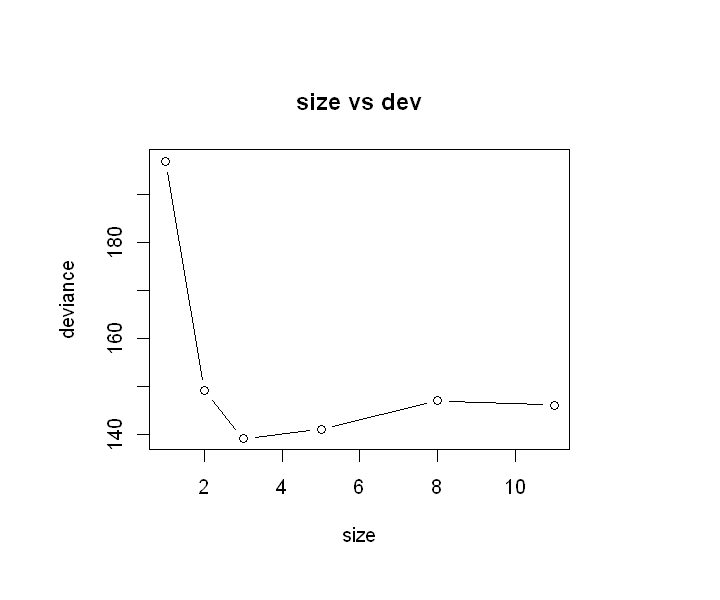

In [1472]:
par(pin = c(3.5,2.5))
plot( CV_model_tree_2$size , CV_model_tree_2$dev , type='b' , xlab="size", ylab='deviance', main='size vs dev' )

***Discussion:*** \
We see that there is an elbow around size of 3, so it might be a good idea to try our decision tree model one more time with depth of 3.

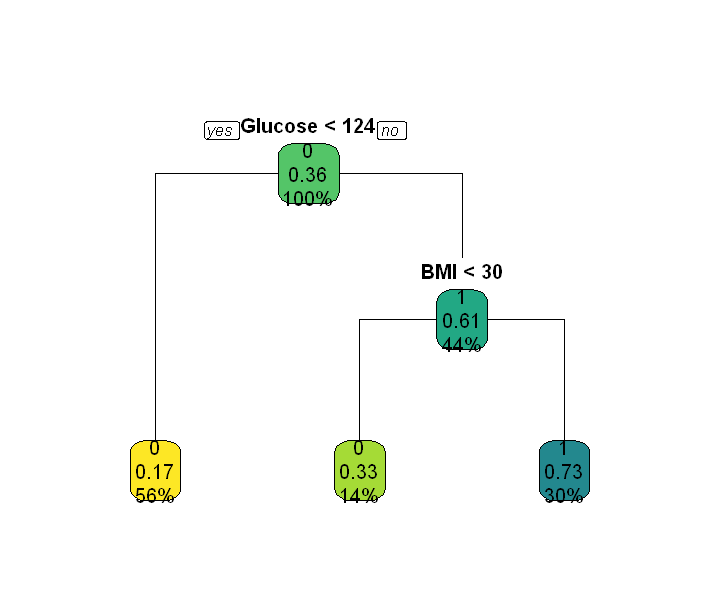

In [1473]:
model_tree_short = rpart(Outcome ~ . , data=db_train, method = "class", control = list(maxdepth = 3))
rpart.plot(model_tree_short, box.palette = "YlGnBl" ,type =1)

Now let's see if it helped our accuracy

In [1467]:
predicted_train = predict(model_tree_short, newdata = db_train, type = "class")
accuracy_dt_train = mean(db_train$Outcome == predicted_train)
cat("Accuracy of the decision tree on predicting train data is", accuracy_dt_train)

Accuracy of the decision tree on predicting train data is 0.7783985

In [1468]:
predicted_test = predict(model_tree_short, newdata = db_test, type = "class")
accuracy_dt_test = mean(db_test$Outcome == predicted_test)
cat("Accuracy of the decision tree on predicting test data is", accuracy_dt_test)


Accuracy of the decision tree on predicting test data is 0.7186147

***Discussion:*** \
We see that the accuracy of predicting both our train set and test set decreased, this could mean that shrinking our tree to depth of 3 did not help our model in predicting the outcome better.

<font size="3"> **Part 1.9:**</font> 

Variable Importance of our Decision Tree:

In [1474]:
print(model_tree$variable.importance)

                 Glucose                      BMI                      Age 
               61.108507                24.656987                20.945157 
                 Insulin            BloodPressure              Pregnancies 
               14.886887                13.406367                11.285809 
           SkinThickness DiabetesPedigreeFunction 
                9.707029                 3.479660 


Significance level of our logistic regression coefficients:

In [1475]:
#The statistically significant variables (reject H_0)
summary(model_log)$coef[which(summary(model_log)$coef[,4] < alpha),]

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-9.69324363,0.990022123,-9.790936,1.231500e-22
Pregnancies,0.10036227,0.038099132,2.634240,8.432576e-03
Glucose,0.03368434,0.004273078,7.882921,3.198147e-15
BMI,0.11510576,0.022003563,5.231233,1.683834e-07
DiabetesPedigreeFunction,1.14092753,0.374240857,3.048645,2.298759e-03


In [1476]:
##The statistically insignificant variables (cannot reject H_0)
summary(model_log)$coef[which(summary(model_log)$coef[,4] > alpha),]

,Estimate,Std. Error,z value,Pr(>|z|)
BloodPressure,0.0005226893,0.010124450,0.05162644,0.9588263
SkinThickness,-0.0094043630,0.015073434,-0.62390314,0.5326912
Insulin,-0.0008422249,0.001074494,-0.78383415,0.4331374
Age,0.0127854230,0.011410757,1.12047103,0.2625131


***Discussion:*** \
**Glucose** has the highest variable importance following by **BMI** and **Age**. The lowest variable importances belong to **DiabetesPedigreeFunction** and **Skinthickness**. Interestingly, SkinThickness is also among the insignificant coefficients in our logistic regression model. Also Glucose and BMI are among the significant coefficients of the logistic regression model. There is Age that has insignificant coefficient in the logistic regression model, however it is the 3rd highest important variable in the decision tree. **DiabetesPedigreeFunction** coefficient is significant in our logistic regression model but in the decision tree does not have a high importance value.

<font size="3"> **Part 1.10:**</font> 

***Discussion:*** \
Decision tree models handle categorical data better. They also do not require to fix the missing values, as we did earlier for zero values in BloodPressure, SkinThickness and BMI. Also the accuracy of our decision tree model on train set was better than the logistic regression model accuracy on the train set.

<font size="3"> **Part 1.11:**</font> 

Scale our train and test data. Note that we exclude column number 9 since it is our response and a categorical column.

In [1520]:
db_train_scaled = db_train
db_train_scaled[, -9] = scale(db_train[,-9])
head(db_train_scaled)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0.6266416,0.7805144,-0.09399244,0.59554787,-0.72499372,0.1749044,0.5089661,1.3955056,1
2,-0.8288366,-1.1205355,-0.58219853,-0.05892419,-0.72499372,-0.8262648,-0.3886942,-0.2080921,0
3,1.2088329,1.8366532,-0.74493390,-0.04218939,-0.72499372,-1.2982446,0.6553238,-0.1236922,1
4,-0.8288366,-0.9998339,-0.58219853,-0.71339626,0.15179377,-0.6117286,-0.9871344,-1.0520908,0
6,0.3355460,-0.1850982,0.06874293,-0.04218939,-0.72499372,-0.9692890,-0.8765531,-0.2924919,0
7,-0.2466453,-1.3317632,-1.88408145,0.26831184,0.09582861,-0.1969585,-0.7236906,-0.6300914,1


In [1521]:
db_test_scaled = db_test
db_test_scaled[, -9] = scale(db_test[, -9])
head(db_test_scaled)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
5,-1.19290767,0.6560164,-2.6728915,0.8659194,0.6308286,1.5825173,4.7485249,0.02433852,1
9,-0.57157357,2.7290641,-0.0576863,2.1495775,3.4679363,-0.3245467,-0.8304315,1.75424586,1
11,0.04976052,-0.2768551,1.8601308,0.1154184,-0.6401956,0.7500687,-0.7439969,-0.23514758,0
12,1.91376281,1.7270910,0.2910077,0.1154184,-0.6401956,0.8106104,0.1622561,0.11083389,1
13,1.91376281,0.7251180,0.8140488,0.1154184,-0.6401956,-0.8391513,2.5300385,2.10022732,0
14,-0.88224062,2.4526577,-0.9294214,-0.6744703,5.7603193,-0.3850884,-0.2018166,2.27321806,1


<font size="3"> **Part 1.12:**</font> 

 <font size="3"> **LOGISTIC REGRESSION**</font> 

In [1522]:
model_log_scaled<- glm(Outcome ~ ., data = db_train_scaled, family = "binomial")
predicted_prob_log_s = predict(model_log_scaled,type="response")
predicted_outcome_log_scaled = ifelse(predicted_prob_log_s < 0.5, 0, 1)

accuracy_log_train = mean(db_train$Outcome == predicted_outcome_log)
accuracy_log_train_scaled = mean(db_train_scaled$Outcome == predicted_outcome_log_scaled)


paste("Accuracy of the logistic regression on predicting train data is", accuracy_log_train)

paste("Accuracy of the logistic regression on predicting scaled train data is", accuracy_log_train_scaled)

[1] "Accuracy of the logistic regression on predicting train data is 0.782122905027933"

[1] "Accuracy of the logistic regression on predicting scaled train data is 0.782122905027933"

It looks like scaling our data did not have any effect on how our model fit the data.

 <font size="3"> **DECISION TREE**</font> 

[1] "Accuracy of the decision tree on predicting train data is 0.778398510242086"

[1] "Accuracy of the decision tree on predicting scaled train data is 0.778398510242086"

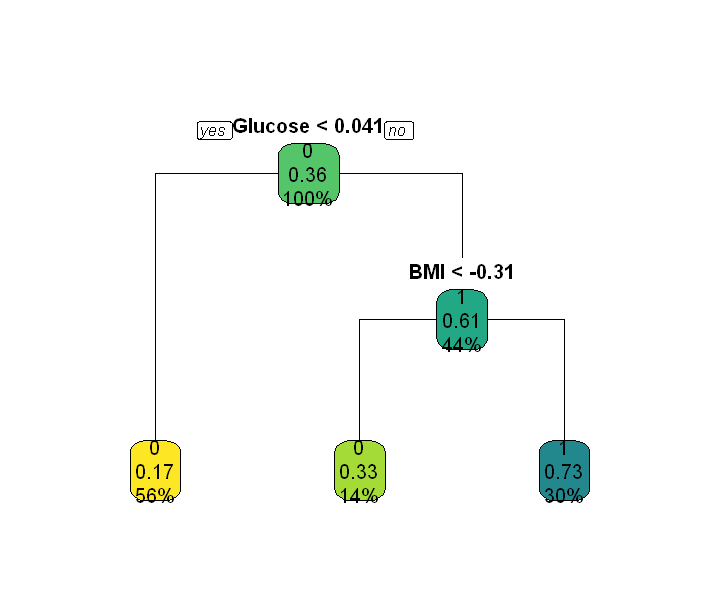

In [1523]:
model_tree_scaled = rpart(Outcome ~ . , data=db_train_scaled, method = "class", control = list(maxdepth = 3))
rpart.plot(model_tree_scaled, box.palette = "YlGnBl" ,type =1)

predicted_train = predict(model_tree_scaled, newdata = db_train_scaled, type = "class")
accuracy_dt_train_scaled = mean(db_train$Outcome == predicted_train)

paste("Accuracy of the decision tree on predicting train data is", accuracy_dt_train)

paste("Accuracy of the decision tree on predicting scaled train data is", accuracy_dt_train_scaled)

***Discussion:*** \
Scaling the data did not change the accuracy of our decision tree model

 <font size="5"> **KMEANS**</font> 

<font size="3"> **Part 1.13:**</font> 

We will start with cluster of 2 using our total data set

In [1524]:
model_kmeans_2 = kmeans(db[,c(-9)],2)
print(model_kmeans_2)

K-means clustering with 2 clusters of sizes 162, 606

Cluster means:
  Pregnancies Glucose BloodPressure SkinThickness   Insulin      BMI
1    3.648148 141.463      72.56790      31.14815 255.78395 34.88519
2    3.897690 115.396      72.36169      28.62018  32.75413 31.80847
  DiabetesPedigreeFunction      Age
1                0.5950494 33.67284
2                0.4389488 33.12541

Clustering vector:
  [1] 2 2 2 2 1 2 2 2 1 2 2 2 2 1 1 2 1 2 2 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2
 [38] 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2
[112] 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
[149] 2 2 1 2 1 1 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 1 2 2 1 2 2 2 2 2 1 2 2 2 1 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 1 2 2 2 2 1 2
[223] 2 1 2 2 2 2 1 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 1 1 2 2 2 2 2 1 2 2 2 1
[260] 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

There are 2 centers for each of our variables.

In [1525]:
model_kmeans_2$centers

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3.648148,141.463,72.56790,31.14815,255.78395,34.88519,0.5950494,33.67284
3.897690,115.396,72.36169,28.62018,32.75413,31.80847,0.4389488,33.12541


Now we can create the contingency table

In [1526]:
table(db$Outcome, model_kmeans_2$cluster)

   
      1   2
  0  77 423
  1  85 183

In [1527]:
accuracy_kmeans_2 = (423+85)/768
accuracy_kmeans_2

[1] 0.6614583

***Discussion:*** \
The accuracy of our kmeans model with 2 clusters is not doing a good job in predicting. We can also tell from the contingency table, that the cluster 1 is not predicting the outcome very well.

Now we will plot the clusters based on a few variables to see how well the model clustered our data.

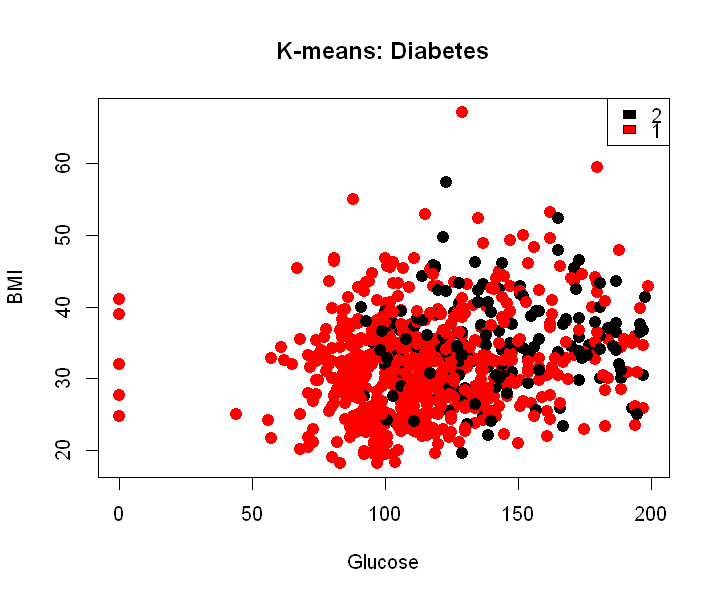

In [1528]:

plot(db$Glucose, db$BMI, col=model_kmeans_2$cluster, 
     main="K-means: Diabetes", 
     xlab="Glucose", ylab="BMI", pch=20, cex=2)
legend("topright", legend=unique(model_kmeans_2$cluster), fill=1:3)

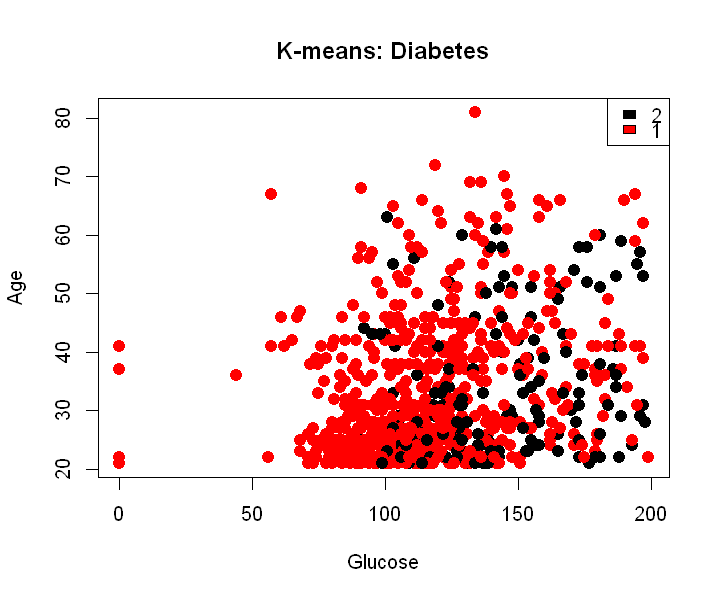

In [1529]:
plot(db$Glucose, db$Age, col=model_kmeans_2$cluster, 
     main="K-means: Diabetes", 
     xlab="Glucose", ylab="Age", pch=20, cex=2)
legend("topright", legend=unique(model_kmeans_2$cluster), fill=1:3)

***Discussion:*** \
We see in plots above that our model has not been successful in clustering the datapoints properly and there is a lot of mixture in the plots and we cannot tell where the boundry of each cluster is.

Let's evaluate our model with different number of clusters

In [1530]:
model_kmeans_3 = kmeans(db[,c(-9)],3)
print(model_kmeans_3)

K-means clustering with 3 clusters of sizes 495, 235, 38

Cluster means:
  Pregnancies  Glucose BloodPressure SkinThickness  Insulin      BMI
1    3.981818 114.0081      72.89128      28.36733  14.4000 31.46116
2    3.527660 129.3277      71.44681      30.30638 159.1021 34.12748
3    4.026316 158.4474      72.00000      32.26316 441.2895 35.10789
  DiabetesPedigreeFunction      Age
1                0.4319313 33.75960
2                0.5402766 31.90213
3                0.5692105 34.76316

Clustering vector:
  [1] 1 1 1 2 2 1 1 1 3 1 1 1 1 3 2 1 2 1 1 2 2 1 1 1 2 2 1 2 2 1 1 2 1 1 1 2 1
 [38] 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 3 3 1 3 2 1 2 1 1 1 2 1 1 1 1 1 2 2 2 1 2
 [75] 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 2 1 1 2
[112] 3 1 1 2 1 1 1 1 1 2 1 2 1 1 2 2 2 2 1 2 1 2 1 1 2 1 2 1 3 1 1 1 1 2 1 1 2
[149] 1 1 2 1 2 3 1 1 2 2 1 2 1 2 2 1 1 2 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 2 1 1 1
[186] 1 3 1 2 2 1 2 1 1 1 2 1 1 2 3 1 1 1 1 2 1 2 1 1 1 1 1 1 2 2 2 2 2 1 1 3 1
[223] 1

In [1531]:
model_kmeans_3$centers

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3.981818,114.0081,72.89128,28.36733,14.4000,31.46116,0.4319313,33.75960
3.527660,129.3277,71.44681,30.30638,159.1021,34.12748,0.5402766,31.90213
4.026316,158.4474,72.00000,32.26316,441.2895,35.10789,0.5692105,34.76316


In [1532]:
table(db$Outcome, model_kmeans_3$cluster)

   
      1   2   3
  0 347 137  16
  1 148  98  22

In [1533]:
(347+22+137)/768

[1] 0.6588542

Accuracy is still the same.

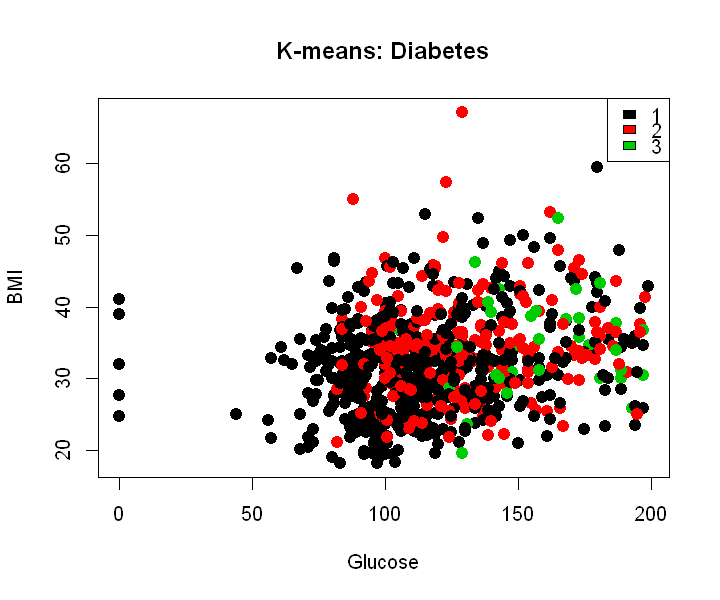

In [1534]:
plot(db$Glucose, db$BMI, col=model_kmeans_3$cluster, 
     main="K-means: Diabetes", 
     xlab="Glucose", ylab="BMI", pch=20, cex=2)
legend("topright", legend=unique(model_kmeans_3$cluster), fill=1:3)


In [1536]:
(sum(model_kmeans_3$cluster == 3))

[1] 38

***Discussion:*** \
We can see in the plot, that clustering the data points got worse with adding to the number of clusters. \
Also we can see that cluster 1 is only fitting a few data points and is not helping the model to make a better prediction.

Comparing only 2 different number of clusters might not be a great way of drawing conclusions. So we will run our model with 1 to 10 different number of clusters and plot the clusters against total within-cluster sum of squares.

In [1537]:
wss = c()
for (i in 1:10) {
    model_kmeans_i = kmeans(db[,c(-9)],i)
    wss = append(wss, model_kmeans_i$tot.withinss)
}
wss

[1] 11293358.0  4845953.7  2635460.4  1883164.3  1576950.6  1204076.5
 [7]  1120664.5   987469.5   928141.6   923818.2

***Discussion:*** \
wss are all big numbers which might help to use scaled data next time to see if it helps to have more reasonable numbers. But as far as number of clusters we need to compare them in a plot.

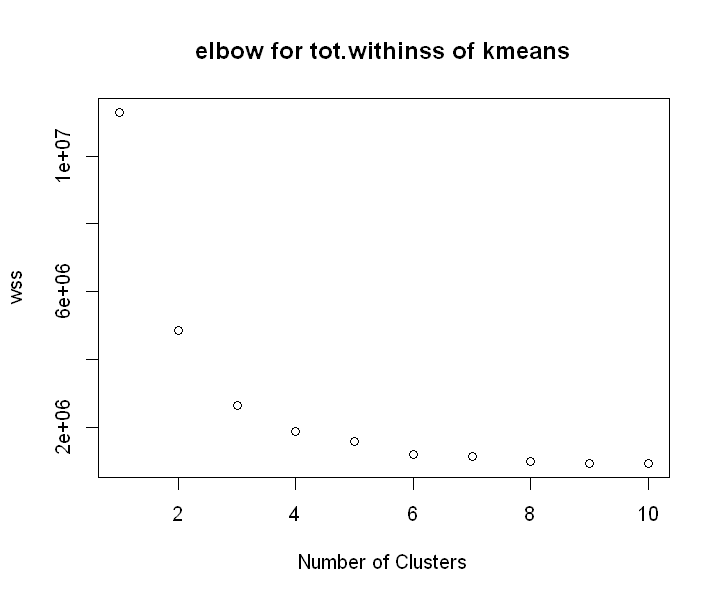

In [1538]:
plot(c(1:10), wss, xlab = "Number of Clusters", main="elbow for tot.withinss of kmeans")

***Discussion:*** \
We see that the elbow happens at number 4, which could mean that increasing the number of clusters from 2 to 4 will help our model but after 4 it will not help a lot. So 4 could be our optimum number.\

Now we want to do the same steps on the scaled data (whole data) except the outcome column.

In [1547]:
db_scaled = db
db_scaled[, -9] = scale(db[,-9])
head(db_scaled)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0.6395305,0.8477713,-0.03349641,0.66506871,-0.6924393,0.1661834,0.4681869,1.42506672,1
-0.8443348,-1.1226647,-0.52951396,-0.01745201,-0.6924393,-0.8519760,-0.3648230,-0.19054773,0
1.2330766,1.9424580,-0.69485314,0.00000000,-0.6924393,-1.3319654,0.6040037,-0.10551539,1
-0.8443348,-0.9975577,-0.52951396,-0.69997273,0.1232213,-0.6337989,-0.9201630,-1.04087112,0
-1.1411079,0.5037269,-2.67892334,0.66506871,0.7653372,1.5479712,5.4813370,-0.02048305,1
0.3427574,-0.1530851,0.13184277,0.00000000,-0.6924393,-0.9974273,-0.8175458,-0.27558007,0


In [1548]:
wss_scaled = c()
for (i in 1:10) {
    model_kmeans_i = kmeans(db_scaled[,c(-9)],i)
    wss_scaled = append(wss_scaled, model_kmeans_i$tot.withinss)
}
wss_scaled

[1] 6136.000 5018.005 4318.791 3986.481 3774.593 3571.187 3407.406 3237.552
 [9] 3086.205 2995.159

Our wss amount scaled down a little too.

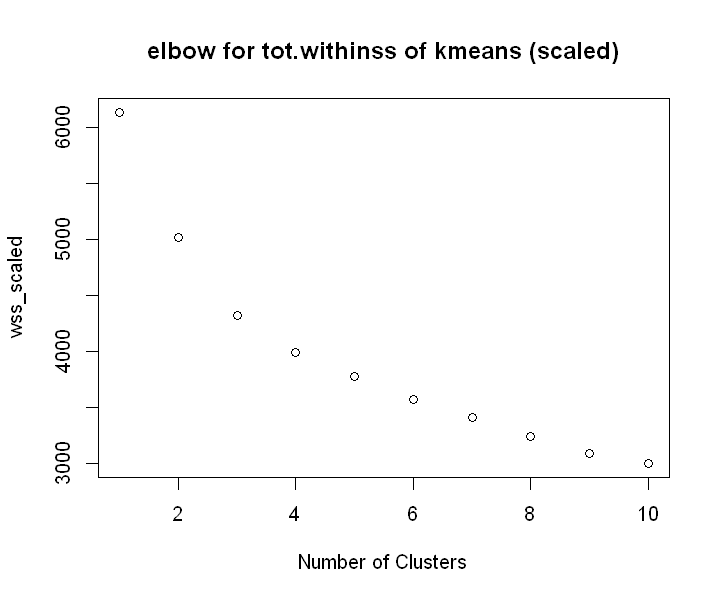

In [1549]:
plot(c(1:10), wss_scaled, xlab = "Number of Clusters", main="elbow for tot.withinss of kmeans (scaled)")

***Discussion:*** \
The curve changed and now the elbow of the curve is 4 for our scaled data. \
Based on how the clustering method works, scaling the data is important, because in clustering the model \
is comparing the similarity or distance of data points. Therefore if our data has different range and scale, this would mislead our clustering model.

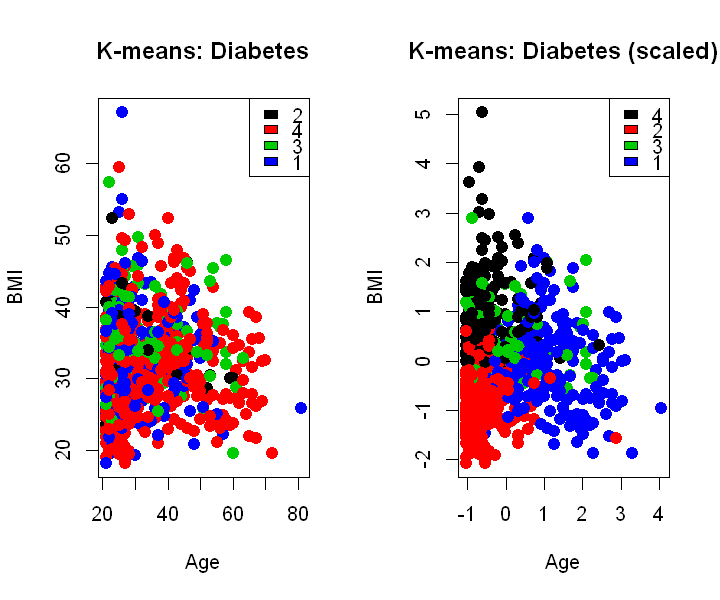

In [1550]:

par(mfrow=c(1,2))

#Our kmeans model
model_kmeans_4 = kmeans(db[,c(-9)],4)
plot(db$Age, db$BMI, col=model_kmeans_4$cluster, 
     main="K-means: Diabetes", 
     xlab="Age", ylab="BMI", pch=20, cex=2)
legend("topright", legend=unique(model_kmeans_4$cluster), fill=1:4)

#Our scaled kmeans model
model_kmeans_4_scaled = kmeans(db_scaled[,c(-9)],4)
plot(db_scaled$Age, db_scaled$BMI, col=model_kmeans_4_scaled$cluster, 
     main="K-means: Diabetes (scaled)", 
     xlab="Age", ylab="BMI", pch=20, cex=2)
legend("topright", legend=unique(model_kmeans_4_scaled$cluster), fill=1:4)


***Discussion:*** \
When we compare the plots above, we realize that after scaling our data, the model was better at clustering the data in our Age-BMI scatter plots. As we said, this is because besides having the optimum number of clusters, we need to scale our data for a better kmeans model.

<font size="3"> **Part 1.14:**</font> 

Contingency table for our data without scaling

In [1551]:
table(db$Outcome, model_kmeans_4$cluster)

   
      1   2   3   4
  0  10 273  55 162
  1  14 142  59  53

In [1552]:
accuracy = (14+59+273+162)/768
accuracy

[1] 0.6614583

Contingency table for our scaled data

In [1553]:
table(db$Outcome, model_kmeans_4_scaled$cluster)

   
      1   2   3   4
  0 100 262  21 117
  1  76  34  49 109

In [1554]:
accuracy_scaled = (100+262+49+117)/768
accuracy_scaled

[1] 0.6875

The accuracy of our kmeans improved by scaling our data.

<font size="3"> **Part 1.15:**</font> 

Let's create our kmedoids model with 4 number of medoids.

In [1585]:
library(cluster)
model_pam = pam(db_scaled[,c(-9)], 4)
model_pam

Medoids:
      ID Pregnancies    Glucose BloodPressure SkinThickness    Insulin
[1,] 755  1.23307662  1.0354319     0.4625211     0.3238084 -0.6924393
[2,] 169  0.04598437 -0.3407457    -0.5295140     0.0000000 -0.6924393
[3,] 422 -0.54756176 -0.8411739    -0.3641748    -1.2687400 -0.0329690
[4,] 245 -0.54756176  0.7852178     0.2971820     0.6650687  0.9909455
              BMI DiabetesPedigreeFunction        Age
[1,] -0.008358168             -0.087153064  0.9999050
[2,] -0.081083840             -0.002644813 -0.3606124
[3,] -0.939246769              0.268988851 -1.0408711
[4,]  0.835259626             -0.431222370 -0.3606124
Clustering vector:
  [1] 1 2 1 3 2 2 2 2 4 1 2 1 1 4 1 2 4 2 2 2 4 1 1 1 1 1 1 3 1 1 1 4 3 2 1 2 1
 [38] 1 2 4 4 1 1 1 1 4 2 3 2 2 3 3 3 1 4 3 4 4 2 4 2 1 2 2 2 2 2 1 3 4 3 2 1 4
 [75] 2 3 2 2 4 3 3 2 2 3 1 2 1 2 1 3 3 3 2 1 3 4 2 3 2 4 2 2 3 3 2 3 3 2 2 2 4
[112] 4 2 2 1 1 2 2 2 3 4 2 2 1 2 2 4 2 4 1 4 2 4 2 3 2 3 3 2 4 1 2 2 1 4 3 2 2
[149] 1 3 4 2 1 4 1 1 3 3 3

Here are the data points that are selected as the medoids of our kmedoids model.

In [1586]:
Medoid = model_pam$medoids[,c(-9)]
Medoid

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1.23307662,1.0354319,0.4625211,0.3238084,-0.6924393,-0.008358168,-0.087153064,0.9999050
0.04598437,-0.3407457,-0.5295140,0.0000000,-0.6924393,-0.081083840,-0.002644813,-0.3606124
-0.54756176,-0.8411739,-0.3641748,-1.2687400,-0.0329690,-0.939246769,0.268988851,-1.0408711
-0.54756176,0.7852178,0.2971820,0.6650687,0.9909455,0.835259626,-0.431222370,-0.3606124


For our kmeans model we will continue using the scaled data with 4 clusters, for better performance.

In [1587]:
#Cluster centers in our kmeans model:
Center = model_kmeans_4_scaled$center
Center

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
-0.6166964,-0.01251737,0.20100409,0.85328948,-0.03148992,1.01558624,0.12545515,-0.4137576
-0.4513110,-0.48466105,-0.51770190,-0.64893228,-0.20223383,-0.69411226,-0.16538030,-0.6237530
0.1307767,1.26866719,0.05862113,0.48306319,2.23377431,0.49656578,0.56989859,0.2127485
1.0308507,0.25157533,0.50336089,0.03579904,-0.40248125,-0.03559979,-0.05761257,1.0732736


We will calculate the distance between each pair of a kmeans-center and a medoid by optaining the maximum distance amoung their dimensions.

In [1588]:
#function for measuaring the maximum difference amoung the dimensions
max_dist <- function(a, b) max(abs(a - b))

In [1589]:
# comparing distance of each pair of a center and a medoid 
distances = data.frame(matrix(ncol = 4, nrow = 4))
distances = data.frame()
min_distance = 10
for (i in 1:4){
    for (j in 1:4){
        distances[i,j] = max_dist(as.vector(Center[i,]) , as.vector(Medoid[j,]))
    }
}

In [1590]:
colnames(distances) = c("Medoid1", "Medoid2", "Medoid3", "Medoid4")
rownames(distances) = c("Center1", "Center2", "Center3", "Center4")
distances

,Medoid1,Medoid2,Medoid3,Medoid4
Center1,1.8497730,1.0966701,2.1220295,1.022435
Center2,1.6843877,0.6489323,0.6198077,1.529372
Center3,2.9262136,2.9262136,2.2667433,1.242829
Center4,0.7838566,1.4338860,2.1141448,1.578412


A dataframe to show the distance between each pair on center-medoid.

In [1591]:
min(distances)

[1] 0.6198077

In [1592]:
#maximum diference in dimensions
abs(Center[1,] - Medoid[3,])

Pregnancies                  Glucose            BloodPressure 
             0.069134634              0.828656509              0.565178871 
           SkinThickness                  Insulin                      BMI 
             2.122029475              0.001479075              1.954833005 
DiabetesPedigreeFunction                      Age 
             0.143533697              0.627113503

***Discussion:*** \
Center 2 from our kmeans model and Medoid 3 from our kmedoids model are the closes cluster centers to each other, and they have the largest difference in dimensions, in **SkinThickness** variable.

<font size="3"> **Part 1.16:**</font> 

 <font size="5"> **T-SNE**</font> 

We need to use data in a matrix format for tsne.

In [1568]:
library('Rtsne')
db_matrix = as.matrix(db[,c(-9)])
print( head( db_matrix ) )

     Pregnancies Glucose BloodPressure SkinThickness Insulin  BMI
[1,]           6     148            72      35.00000       0 33.6
[2,]           1      85            66      29.00000       0 26.6
[3,]           8     183            64      29.15342       0 23.3
[4,]           1      89            66      23.00000      94 28.1
[5,]           0     137            40      35.00000     168 43.1
[6,]           5     116            74      29.15342       0 25.6
     DiabetesPedigreeFunction Age
[1,]                    0.627  50
[2,]                    0.351  31
[3,]                    0.672  32
[4,]                    0.167  21
[5,]                    2.288  33
[6,]                    0.201  30


In [1569]:
tsne_out = Rtsne(db_matrix,pca=FALSE,perplexity=10,theta=0.2)
names(tsne_out)

[1] "N"                   "Y"                   "costs"              
 [4] "itercosts"           "origD"               "perplexity"         
 [7] "theta"               "max_iter"            "stop_lying_iter"    
[10] "mom_switch_iter"     "momentum"            "final_momentum"     
[13] "eta"                 "exaggeration_factor"

We see in the plot below that coloring our tsne points based on the outcome column of our data does not exhibit any visual clustering.

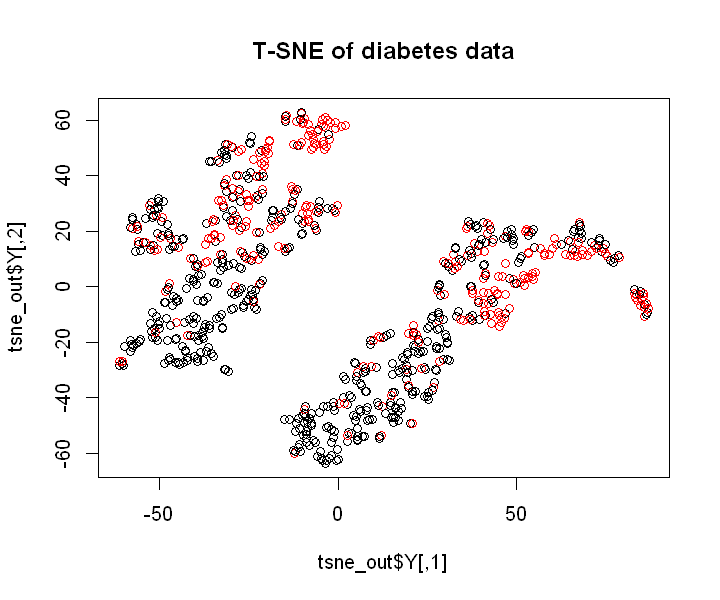

In [1570]:
plot(tsne_out$Y,col=db$Outcome,main='T-SNE of diabetes data')

Now let's plot our tsne ys and color our scatter plot based on the kmeans model clusters that we had in previous section.

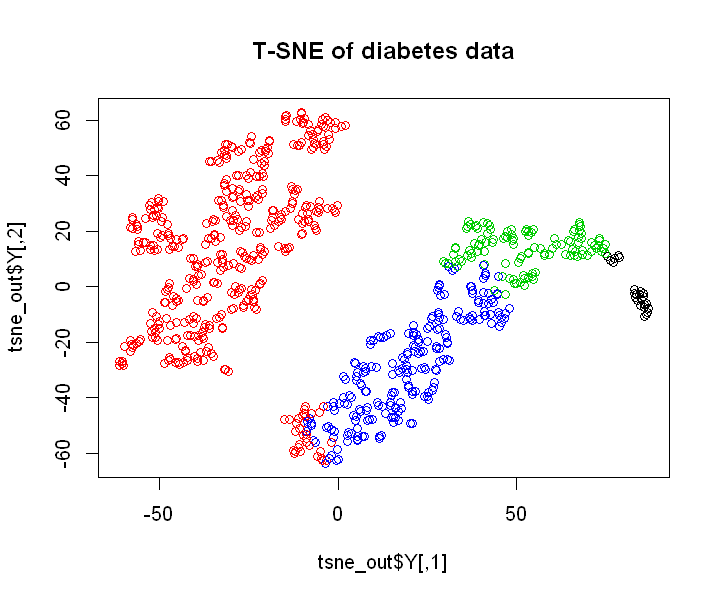

In [1573]:
plot(tsne_out$Y,col=model_kmeans_4$cluster,main='T-SNE of diabetes data')

***Discussion:*** \
We see that there are some clear boundaries between our tsne data points colored by our kmeans model clusters. However the cluster sizes are pretty different.

Now we will perform kmeans on the result of the tsne to see if it performs better than our regular clustering.

In [1574]:
tk = kmeans((tsne_out$Y),4)
names(tk)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

Check out tk centers and clusters

In [1575]:
tk$center

-18.053375,38.465996
8.945173,-39.658054
-41.629989,-2.009515
51.672146,6.029602


In [1576]:
head(tk$cluster)

[1] 1 3 1 2 4 3

plot tsne again, this time color the data points with clusters of our new kmeans model tk.

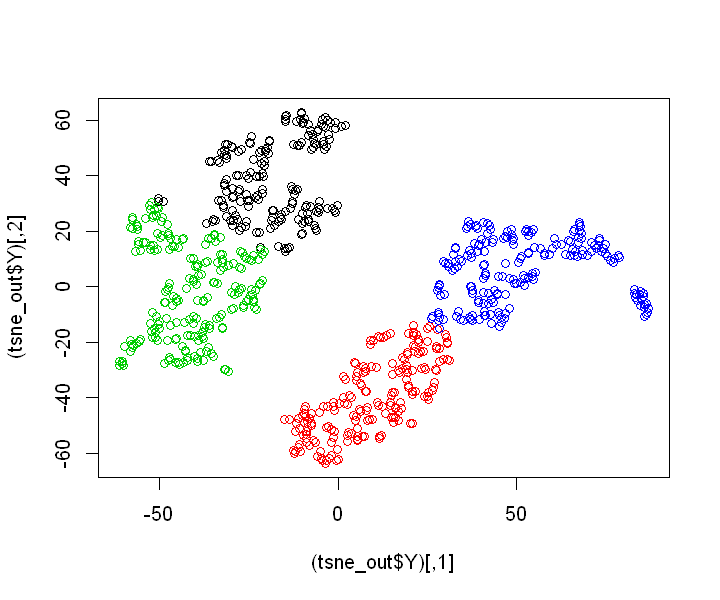

In [1577]:
plot( (tsne_out$Y), col=tk$cluster ) 

***Discussion:*** \
Visually there is cleaner boundaries in clustering and it has divided the data points into 4 similar size clusters. 

Contingency table for our data 

In [1578]:
table(db$Outcome, tk$cluster)

   
      1   2   3   4
  0  74 164 169  93
  1 101  25  39 103

In [1579]:
accuracy = (101+164+169+103)/768
accuracy

[1] 0.6992188

***Discussion:*** \
The accuracy of our kmeans model on the tsne output is better than the accuracy of the kmeans model on our data, this could mean that using tsne has helped our kmean model to cluster our data better, because tsne has converted the high-dimensional dataset to a 2 dimensional one which would be easier to cluster. However the accuracy of our tk kmeans model is similar to the regular kmeans model using scaled data. This could mean that scaling our data also can help our kmeans model to evaluate the distances between our data point in multi dimensional space much better.

<font size="3"> **Part 1.17:**</font> 

Here we have the center of our clusters in the kmedoids model:

In [1615]:
Medoid

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1.23307662,1.0354319,0.4625211,0.3238084,-0.6924393,-0.008358168,-0.087153064,0.9999050
0.04598437,-0.3407457,-0.5295140,0.0000000,-0.6924393,-0.081083840,-0.002644813,-0.3606124
-0.54756176,-0.8411739,-0.3641748,-1.2687400,-0.0329690,-0.939246769,0.268988851,-1.0408711
-0.54756176,0.7852178,0.2971820,0.6650687,0.9909455,0.835259626,-0.431222370,-0.3606124


Now we will calculate the distance of each of our data points to our four medoids. Then we will get the sum of squares of each data point to the 4 medoids. Finally we will find the maximum number. This would be the subject that has the largest sum of square distance to our 4 medoids, and therefore has the biggest contribution to our cluster centers.

In [1689]:
df1 = db[, 1:8] - Medoid[1,]
df2 = db[, 1:8] - Medoid[2,]
df3 = db[, 1:8] - Medoid[3,]
df4 = db[, 1:8] - Medoid[4,]
SSD = rowSums(df1^2) + rowSums(df2^2) + rowSums(df3^2) + rowSums(df4^2)
db[which.max(SSD),]
max(SSD)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
14,1,189,60,23,846,30.1,0.398,59,1


[1] 3040297

Data number 4 has the maximum sum of square distance to our 4 medoids.

Let's see what our logistic regression output is for this data point

In [1694]:
model_log_1<- glm(Outcome ~ ., data = db, family = "binomial")
predicted_prob_1 = predict(model_log_1,type="response")
predicted_outcome_1 = ifelse(predicted_prob_1 <0.5, 0, 1)
paste("The predicted probability of datapoint number 14 in our logistic regression model is:", predicted_prob_1[14])
paste("The predicted outcome of datapoint number 14 in our logistic regression model is:", predicted_outcome_1[14])

[1] "The predicted probability of datapoint number 14 in our logistic regression model is: 0.570112627099944"

[1] "The predicted outcome of datapoint number 14 in our logistic regression model is: 1"